In [1]:
import numpy as np
from GPA import GPA
import pandas as pd
import CML
import maps
import tqdm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import animation


/home/rubens/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. Time series analysis
------------------------------------------------


In [15]:
ga = GPA(0.01)

### Logistic map

In [3]:
#Parametros do modelos
nit = 200
c = CML.CML('gaussian',129)
mapa,par = maps.logisticMap,[4.0]
coupling = 0.3
neigh = [(1,0),(0,1),(-1,0),(0,-1)]
cube = []

for i in tqdm.tqdm(range(nit)):
    cube.append(np.array(c.getCML(neigh,mapa,coupling,par)))

cube = np.array(cube).astype(float)

100%|█████████████████████████████████████████| 200/200 [00:07<00:00, 25.04it/s]


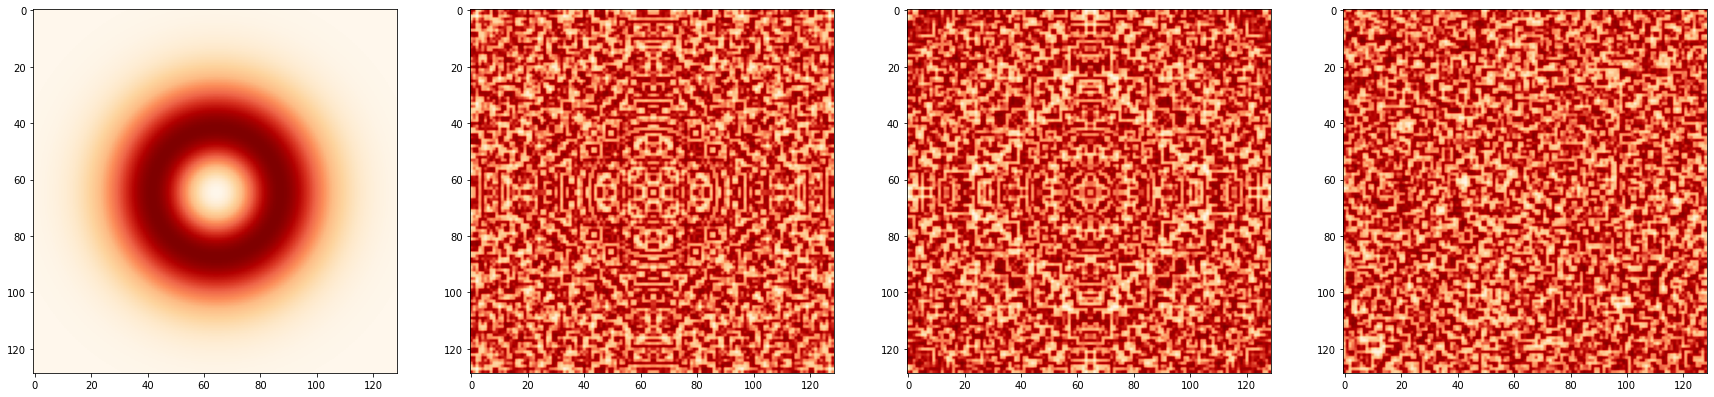

In [4]:
plt.figure(figsize=(30,10))

plt.subplot(1,4,1)
plt.imshow(cube[0],cmap='OrRd')

plt.subplot(1,4,2)
plt.imshow(cube[50],cmap='OrRd')

plt.subplot(1,4,3)
plt.imshow(cube[100],cmap='OrRd')

plt.subplot(1,4,4)
plt.imshow(cube[199],cmap='OrRd')

plt.show()

In [6]:
gas =[]
for c in tqdm.tqdm(cube):
    gas.append(ga(c,moment=["G1","G2","G3"]))
gas = pd.DataFrame(gas)
gas

100%|█████████████████████████████████████████| 200/200 [02:06<00:00,  1.58it/s]


G1        G2        G3
0    0.000000  0.000000  0.000000
1    0.264554  0.001161  0.000919
2    0.266973  0.005854  0.004119
3    0.198448  0.005410  0.007015
4    0.447257  0.009293  0.428821
..        ...       ...       ...
195  0.009073  0.598545  0.549119
196  0.010587  0.596485  0.549522
197  0.009005  0.611919  0.556881
198  0.010555  0.589748  0.546056
199  0.008179  0.578405  0.539121

[200 rows x 3 columns]

## Salvando o dado

In [7]:
gas.to_csv("gpa_log4_c0.3.csv",index=False)
np.save("snap_log4_c0.3",cube,allow_pickle=True)

## Carregando o dado

In [8]:
gas = pd.read_csv("gpa_log4_c0.3.csv")
cube = np.load("snap_log4_c0.3.npy")

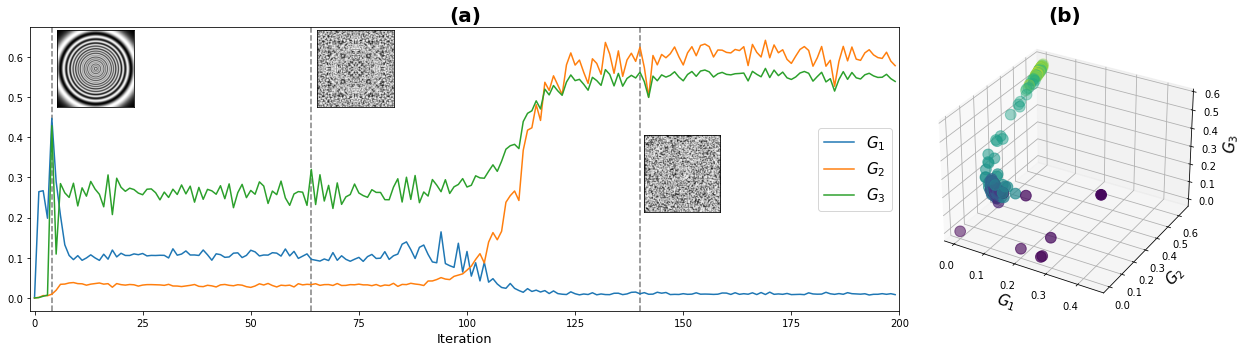

In [72]:
gspc = GridSpec(1, 2,width_ratios=[3,1])
fig = plt.figure(figsize=(17,5))

plt.subplot()
ax = fig.add_subplot(gspc[0,1],projection='3d')
ax.scatter(gas["G1"],gas["G2"],gas["G3"],c=np.arange(len(gas["G3"])),cmap="viridis",s=115)
ax.set_xlabel("$G_1$",fontsize=15)
ax.set_ylabel("$G_2$",fontsize=15)
ax.set_zlabel("$G_3$",fontsize=15)
ax.set_title("(b)",fontsize=20,fontweight='bold')
plt.tight_layout()

ax = plt.subplot(gspc[0,0])
plt.axvline(4,color='k',ls='--',alpha=0.5)
plt.axvline(64,color='k',ls='--',alpha=0.5)
plt.axvline(140,color='k',ls='--',alpha=0.5)
plt.plot(gas["G1"],label="$G_1$")
plt.plot(gas["G2"],label="$G_2$")
plt.plot(gas["G3"],label="$G_3$")
plt.xlim(-1,len(gas["G1"]))
plt.legend(fontsize=15)
plt.xlabel("Iteration",fontsize=13)
plt.title("(a)",fontsize=20,fontweight='bold')

axis = ax.inset_axes([0.025,0.72,0.1,0.27])
axis.set_xticks([],[])
axis.set_yticks([],[])
axis.imshow(cube[4],cmap='gray')

axis = ax.inset_axes([0.3245,0.72,0.1,0.27])
axis.set_xticks([],[])
axis.set_yticks([],[])
axis.imshow(cube[64],cmap='gray')

axis = ax.inset_axes([0.70,0.35,0.1,0.27])
axis.set_xticks([],[])
axis.set_yticks([],[])
axis.imshow(cube[140],cmap='gray')
plt.tight_layout()
plt.savefig("gpaAnalysis_a4_c0.3.png",dpi=300, bbox_inches='tight')
plt.show()

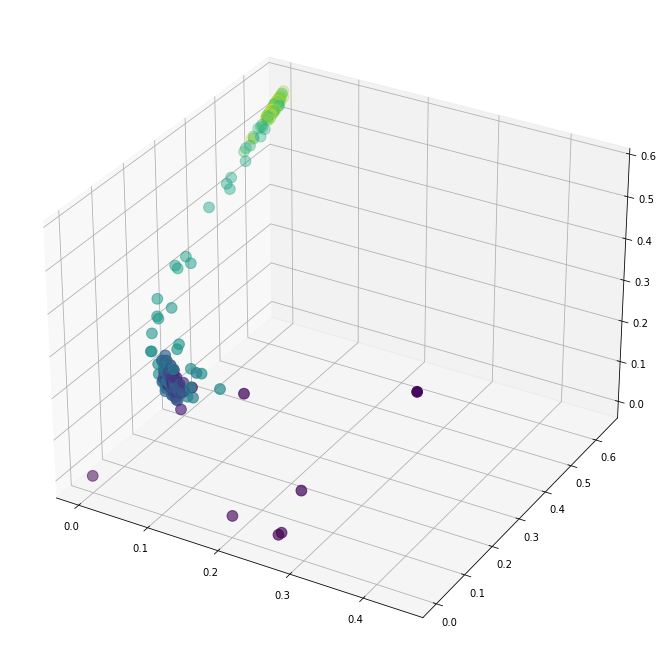

In [10]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(gas["G1"],gas["G2"],gas["G3"],c=np.arange(len(gas["G3"])),cmap="viridis",s=115)
plt.show()

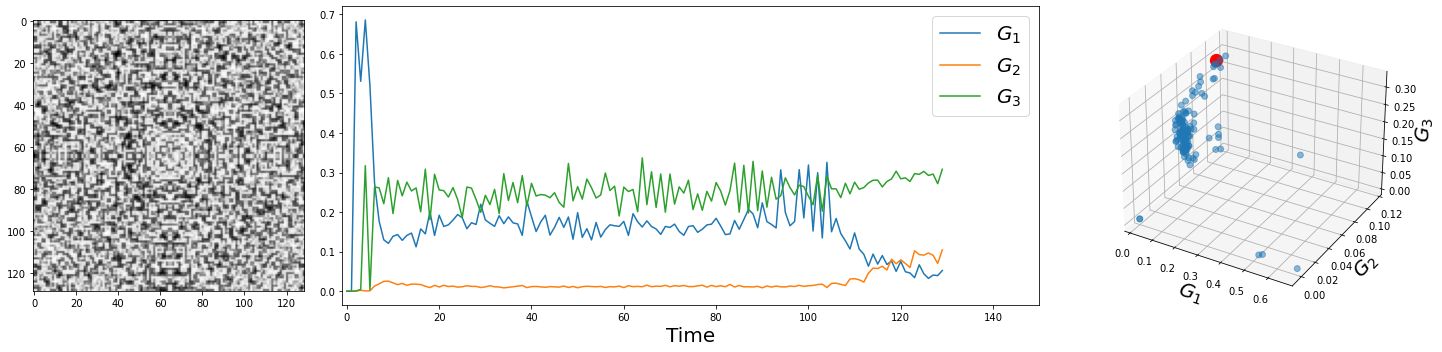

In [7]:
fig = plt.figure(figsize=(20,5))
gs = GridSpec(1,3,width_ratios=[.7,1.8,0.9])

def plot(t):
    plt.clf()
    plt.subplot(gs[0,0])
    plt.imshow(cube[t],cmap='gray')
    
    plt.subplot(gs[0,1])
    plt.plot(gas["G1"][:t],label="$G_1$")
    plt.plot(gas["G2"][:t],label="$G_2$")
    plt.plot(gas["G3"][:t],label="$G_3$")
    plt.xlim(-1,len(gas["G1"]))
    plt.legend(fontsize=20)
    plt.xlabel("Time",fontsize=20)
    
    ax = fig.add_subplot(gs[0,2],projection='3d')
    ax.scatter(gas["G1"][:t],gas["G2"][:t],gas["G3"][:t], s=35,alpha=.5)
    ax.scatter(gas["G1"][t],gas["G2"][t],gas["G3"][t], s=150,color='red')
    ax.set_xlim(-0.01,max(gas["G1"]))
    ax.set_ylim(-0.01,max(gas["G2"]))
    ax.set_zlim(-0.01,max(gas["G3"]))
    
    ax.set_xlabel('$G_1$',fontsize=20)
    ax.set_ylabel('$G_2$',fontsize=20)
    ax.set_zlabel('$G_3$',fontsize=20)
    
plot(130)
plt.tight_layout()
plt.show()

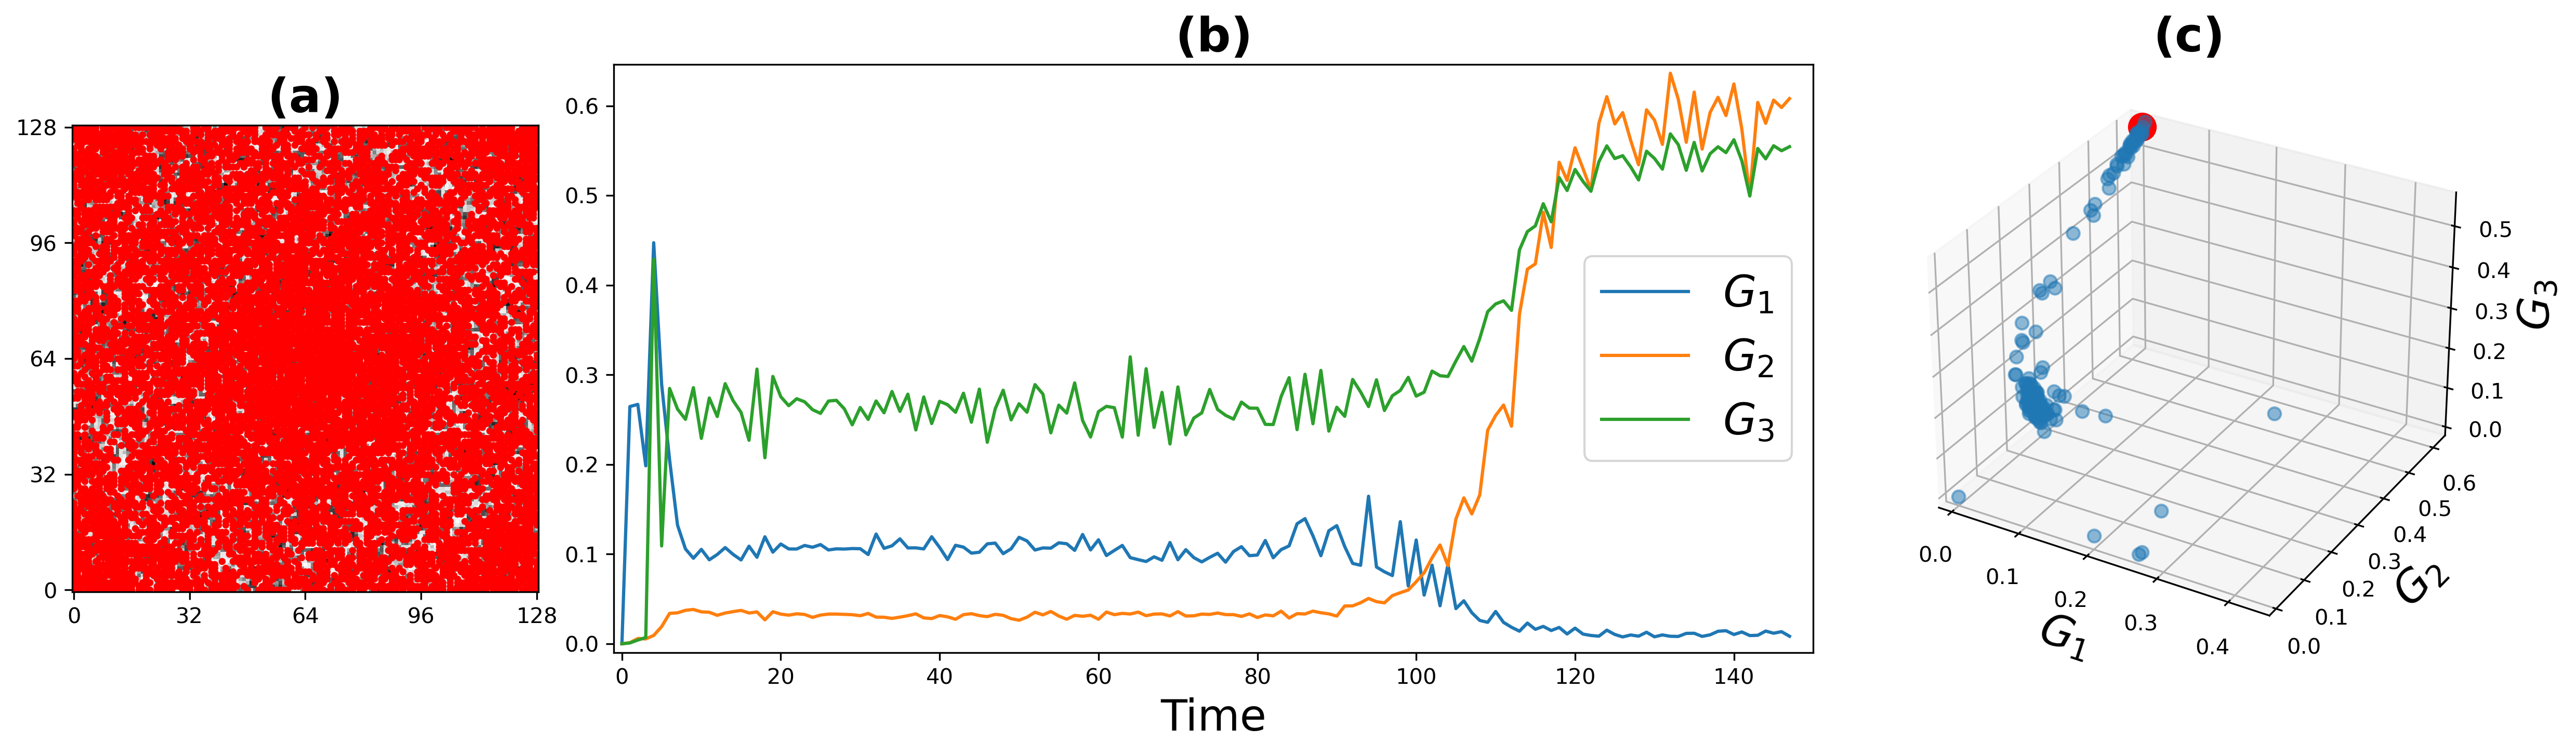

In [31]:
fig = plt.figure(figsize=(20,5),dpi =300)
gs = GridSpec(1,3,width_ratios=[.7,1.8,0.9],wspace=0.1)

def plot(t):
    plt.clf()
    ga(cube[t],moment=["G1"])
    plt.subplot(gs[0,0])
    plt.title("(a)",fontsize=22,fontweight='bold')
    plt.imshow(cube[t],cmap='gray',origin='lower')
    asymm = np.array(ga.asymmetricalP).astype(float)
    sc = np.where(asymm>0)
    plt.xticks([0,32,64,96,128])
    plt.yticks([0,32,64,96,128])
    plt.scatter(*sc,color='r',s=5)
    
    plt.subplot(gs[0,1])
    plt.title("(b)",fontsize=22,fontweight='bold')
    a=plt.plot(gas["G1"][:t],label="$G_1$")
    plt.plot(gas["G2"][:t],label="$G_2$")
    plt.plot(gas["G3"][:t],label="$G_3$")
    plt.xlim(-1,len(gas["G1"]))
    plt.ylim(-0.01,gas.to_numpy().max()+0.01)
    plt.legend(fontsize=20)
    plt.xlabel("Time",fontsize=20)
    
    ax = fig.add_subplot(gs[0,2],projection='3d')
    plt.title("(c)",fontsize=22,fontweight='bold')
    ax.scatter(gas["G1"][:t],gas["G2"][:t],gas["G3"][:t], s=35,alpha=.5)
    ax.scatter(gas["G1"][t],gas["G2"][t],gas["G3"][t], s=150,color='red')
    ax.set_xlim(-0.01,max(gas["G1"]))
    ax.set_ylim(-0.01,max(gas["G2"]))
    ax.set_zlim(-0.01,max(gas["G3"]))
    
    ax.set_xlabel('$G_1$',fontsize=20)
    ax.set_ylabel('$G_2$',fontsize=20)
    ax.set_zlabel('$G_3$',fontsize=20)
    return a

def inti():
    return

anim = animation.FuncAnimation(fig, plot,
                               frames=149, interval=1500, blit=True)

writervideo = animation.FFMpegWriter(fps=5,bitrate=10000)
anim.save('logistic4-GPA.mp4', writer=writervideo)
plt.show()

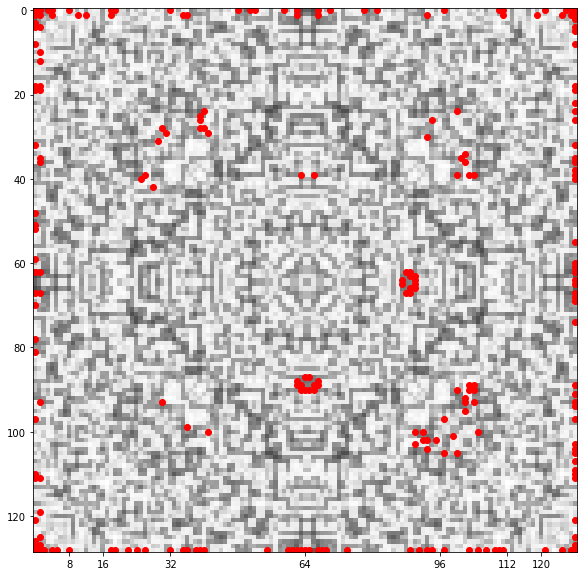

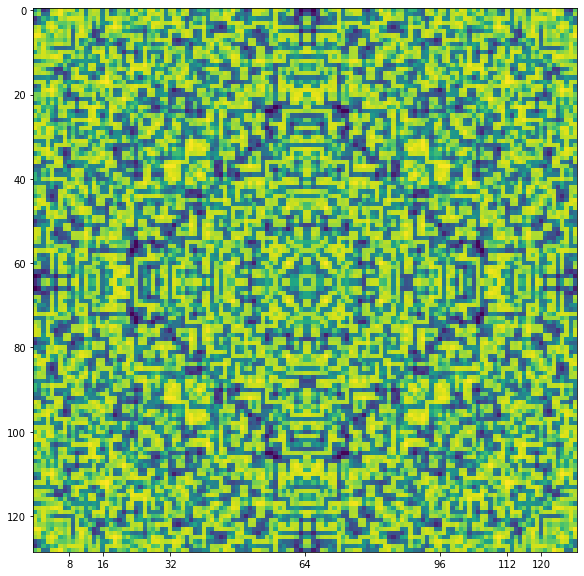

In [281]:
data = cube[100]
ga(data)

asymm = np.array(ga.asymmetricalP).astype(float)
mask = data.copy()
mask[asymm<1] = np.nan
sc = np.where(asymm>0)

plt.figure(figsize=(10,10))
plt.imshow(data,cmap='gray',alpha=0.7)
plt.scatter(*sc,color='r')
plt.xticks([8,16,32,64,96,112,120])

plt.figure(figsize=(10,10))
plt.imshow(data)
plt.xticks([8,16,32,64,96,112,120])
plt.show()
plt.show()

In [58]:
cube[50]

array([[0.42236918, 0.73217447, 0.42077317, ..., 0.34129984, 0.4205838 ,
        0.73221979],
       [0.73220554, 0.81591493, 0.28377721, ..., 0.30525788, 0.283712  ,
        0.81594242],
       [0.42063823, 0.28374027, 0.39939854, ..., 0.8343089 , 0.39943693,
        0.28372693],
       ...,
       [0.3413846 , 0.30527406, 0.83425425, ..., 0.55211045, 0.83427168,
        0.30527435],
       [0.42071936, 0.28375903, 0.39939901, ..., 0.83427218, 0.39941118,
        0.28375834],
       [0.73218882, 0.8159098 , 0.28377367, ..., 0.30525733, 0.28372127,
        0.81592904]])

### 1.2. SOM Map

In [73]:
#Parametros do modelos
nit = 200
c = CML.CML('gaussian',129)
mapa,par = maps.somMap,[0.6,0.2]
coupling = 0.3
neigh = [(1,0),(0,1),(-1,0),(0,-1)]
cube = []

for i in tqdm.tqdm(range(nit)):
    cube.append(np.array(c.getCML(neigh,mapa,coupling,par)))

cube = np.array(cube).astype(float)

100%|█████████████████████████████████████████| 200/200 [00:06<00:00, 29.17it/s]


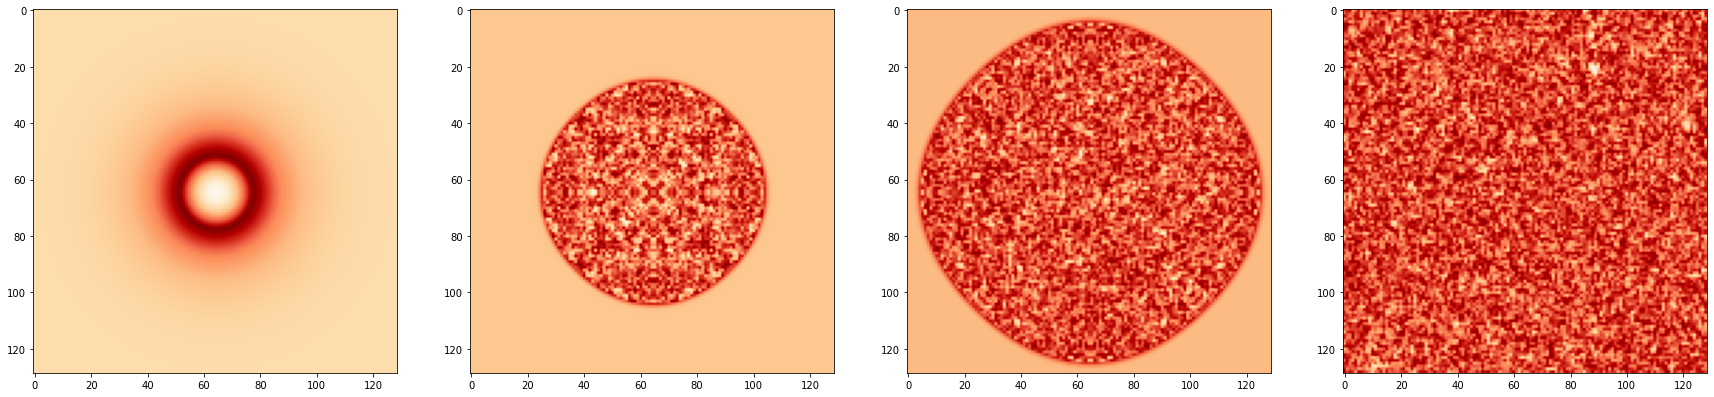

In [74]:
plt.figure(figsize=(30,10))

plt.subplot(1,4,1)
plt.imshow(cube[0],cmap='OrRd')

plt.subplot(1,4,2)
plt.imshow(cube[50],cmap='OrRd')

plt.subplot(1,4,3)
plt.imshow(cube[100],cmap='OrRd')

plt.subplot(1,4,4)
plt.imshow(cube[199],cmap='OrRd')

plt.show()

In [75]:
gas =[]
for c in tqdm.tqdm(cube):
    gas.append(ga(c,moment=["G1","G2","G3"]))
gas = pd.DataFrame(gas)
gas

100%|█████████████████████████████████████████| 200/200 [01:37<00:00,  2.04it/s]


G1        G2        G3
0    0.000000  0.000000  0.000000
1    0.000000  0.000000  0.000000
2    0.000000  0.000000  0.000000
3    0.000000  0.000000  0.000000
4    0.000000  0.000000  0.000000
..        ...       ...       ...
195  0.012581  0.429429  0.465199
196  0.013221  0.429021  0.467407
197  0.011915  0.577342  0.539678
198  0.014050  0.473741  0.488204
199  0.011478  0.478196  0.490194

[200 rows x 3 columns]

In [76]:
gas.to_csv("gpa_som0.6_0.2_c0.3.csv",index=False)
np.save("snap_som0.6_0.2_c0.3",cube,allow_pickle=True)

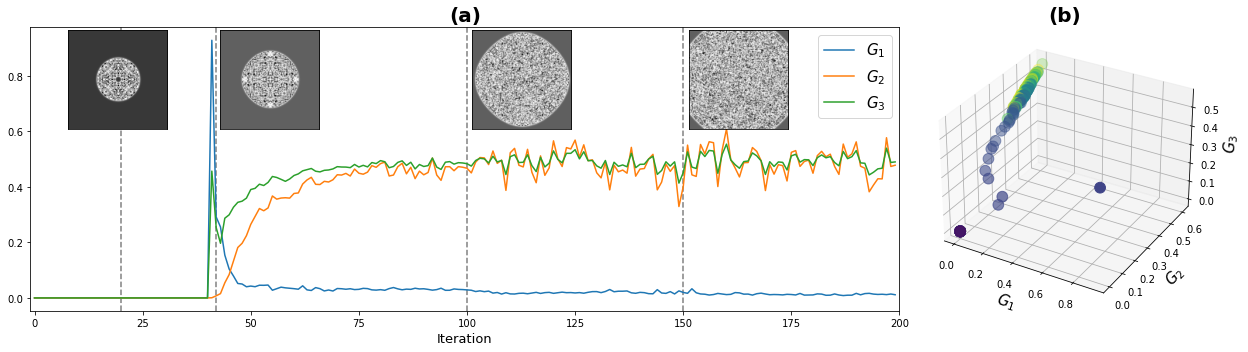

In [98]:
gspc = GridSpec(1, 2,width_ratios=[3,1])
fig = plt.figure(figsize=(17,5))

plt.subplot()
ax = fig.add_subplot(gspc[0,1],projection='3d')
ax.scatter(gas["G1"],gas["G2"],gas["G3"],c=np.arange(len(gas["G3"])),cmap="viridis",s=115)
ax.set_xlabel("$G_1$",fontsize=15)
ax.set_ylabel("$G_2$",fontsize=15)
ax.set_zlabel("$G_3$",fontsize=15)
ax.set_title("(b)",fontsize=20,fontweight='bold')
plt.tight_layout()

ax = plt.subplot(gspc[0,0])
plt.axvline(20,color='k',ls='--',alpha=0.5)
plt.axvline(42,color='k',ls='--',alpha=0.5)
plt.axvline(100,color='k',ls='--',alpha=0.5)
plt.axvline(150,color='k',ls='--',alpha=0.5)
plt.plot(gas["G1"],label="$G_1$")
plt.plot(gas["G2"],label="$G_2$")
plt.plot(gas["G3"],label="$G_3$")
plt.xlim(-1,len(gas["G1"]))
plt.legend(fontsize=15)
plt.xlabel("Iteration",fontsize=13)
plt.title("(a)",fontsize=20,fontweight='bold')

axis = ax.inset_axes([0.025,0.64,0.15,0.35])
axis.set_xticks([],[])
axis.set_yticks([],[])
axis.imshow(cube[20],cmap='gray')

axis = ax.inset_axes([0.20,0.64,0.15,0.35])
axis.set_xticks([],[])
axis.set_yticks([],[])
axis.imshow(cube[42],cmap='gray')

axis = ax.inset_axes([0.49,0.64,0.15,0.35])
axis.set_xticks([],[])
axis.set_yticks([],[])
axis.imshow(cube[100],cmap='gray')

axis = ax.inset_axes([0.74,0.64,0.15,0.35])
axis.set_xticks([],[])
axis.set_yticks([],[])
axis.imshow(cube[150],cmap='gray')

plt.tight_layout()
plt.savefig("gpaAnalysis_som.png",dpi=300, bbox_inches='tight')
plt.show()

## Poincare plot e iteração dos mapas

In [53]:
def poincareSec(mapa=maps.somMap, nit= 2000, par=[0.6+1e-10,0.2]):
    it = []
    xit,yit = [],[]
    x = np.random.rand()
    print(x)
    for i in range(nit):
        x = mapa(x,par)
        it.append(x)

        xit.append(x)
        yit.append(x)

        xit.append(x)
        yit.append(mapa(x,par))

        xit.append(mapa(x,par))
        yit.append(mapa(x,par))
    return xit,yit,it

0.17065338265854102
0.9996663329997219
0.9598943649947006
0.8730983806769463
0.16844004585993022
0.23108056419927048
0.1686988287772605
0.1051581944065264


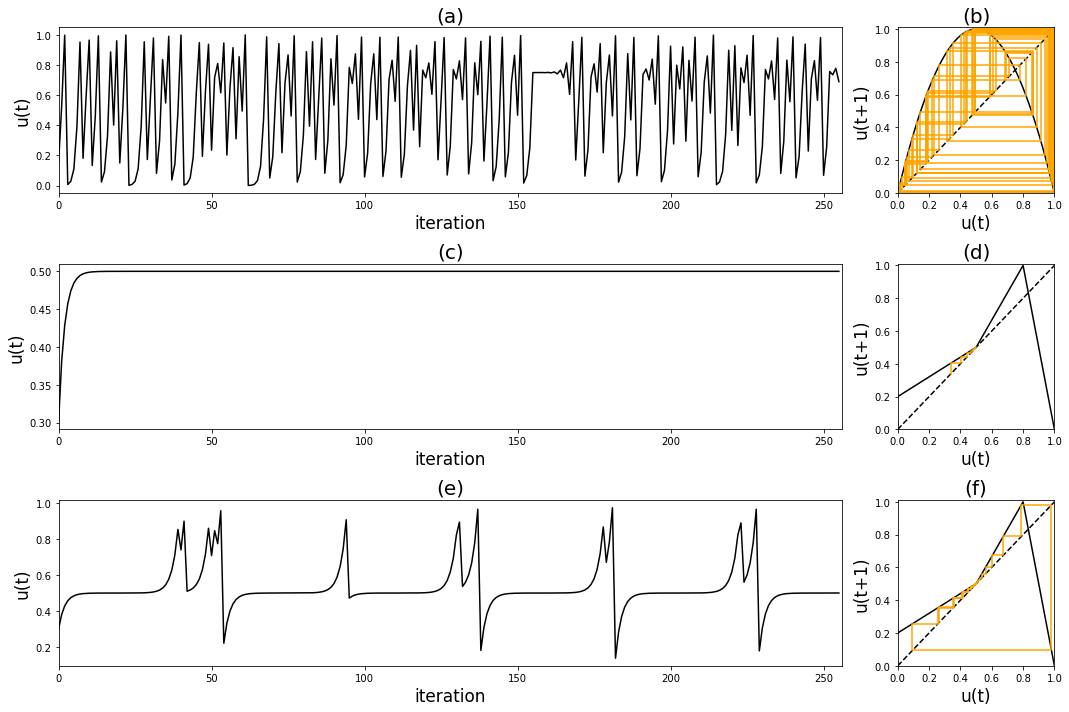

In [103]:
nit = 2000

par = [0.6+1e-10,0.2]
somIt = []
xit,yit,it = poincareSec()

xi = np.linspace(0,1,1000)
yi = np.array([maps.somMap(p,par) for p in xi])

print(np.max(yi))

plt.figure(figsize=(15,10))

gs=GridSpec(3,2,width_ratios=[5,1])

plt.subplot(gs[0,0])
xit,yit,it = poincareSec(maps.logisticMap,nit=256,par = [4])
plt.plot(it,color='k')
plt.title("(a)",fontsize=20)
plt.xlim(0,len(it))
plt.xlabel("iteration",fontsize=17)
plt.ylabel("u(t)",fontsize=17)

plt.subplot(gs[0,1])
xi = np.linspace(0,1,1000)
yi = np.array([maps.logisticMap(p,[4]) for p in xi])
plt.plot(xi,yi,color='k')
plt.plot(xi,xi,color='k',ls='--')
xit,yit,it = poincareSec(maps.logisticMap,nit=64,par = [4])
plt.plot(xit,yit,color='orange')
plt.xlim(0,1)
plt.ylim(0,1.01)
plt.title("(b)",fontsize=20)
plt.xlabel("u(t)",fontsize=17)
plt.ylabel("u(t+1)",fontsize=17)


###########################################
plt.subplot(gs[1,0])
xit,yit,it = poincareSec(maps.somMap,nit=256,par = [0.6,0.2])
plt.plot(it,color='k')
plt.xlim(0,len(it))
plt.title("(c)",fontsize=20)
plt.xlabel("iteration",fontsize=17)
plt.ylabel("u(t)",fontsize=17)

plt.subplot(gs[1,1])
xi = np.linspace(0,1,1000)
yi = np.array([maps.somMap(p,[0.6,0.2]) for p in xi])
plt.plot(xi,yi,color='k')
plt.plot(xi,xi,color='k',ls='--')
xit,yit,it = poincareSec(maps.somMap,nit=64,par = [0.6,0.2])
plt.plot(xit,yit,color='orange')
plt.xlim(0,1)
plt.ylim(0,1.01)
plt.title("(d)",fontsize=20)
plt.xlabel("u(t)",fontsize=17)
plt.ylabel("u(t+1)",fontsize=17)
###############################################

###########################################
plt.subplot(gs[2,0])
xit,yit,it = poincareSec(maps.somMap,nit=256,par = [0.6+1e-5,0.2])
plt.plot(it,color='k')
plt.xlim(0,len(it))
plt.title("(e)",fontsize=20)
plt.xlabel("iteration",fontsize=17)
plt.ylabel("u(t)",fontsize=17)

plt.subplot(gs[2,1])
xi = np.linspace(0,1,1000)
yi = np.array([maps.somMap(p,[0.6,0.2]) for p in xi])
plt.plot(xi,yi,color='k')
plt.plot(xi,xi,color='k',ls='--')
xit,yit,it = poincareSec(maps.somMap,nit=64,par = [0.6+1e-5,0.2])
plt.plot(xit,yit,color='orange')
plt.xlim(0,1)
plt.ylim(0,1.01)
plt.title("(f)",fontsize=20)
plt.xlabel("u(t)",fontsize=17)
plt.ylabel("u(t+1)",fontsize=17)

###############################################

plt.tight_layout()
plt.show()


## Teste de espaço de fase
---------------------------------------------
Condicao inicial: Gaussiana (32x32)

eps- [0-1] - delta- 0.025

alpha - [3.0-4.0] - delta- 0.025


In [2]:
ga = GPA(0.01)

In [3]:
eps = np.round(np.arange(0,1,0.01),3)
alphas = np.round(np.arange(3,4,0.01),3)

In [ ]:
eps = np.round(np.arange(0,1,0.01),3)
alphas = np.round(np.arange(3,4,0.01),3)
nit  = 1000
neigh = [(1,0),(0,1),(-1,0),(0,-1)]


mapa = maps.logisticMap

psSize = (len(eps),len(alphas))
print("Phase Space size: ", psSize)

g1PS, g2PS, g3PS = np.zeros(psSize),np.zeros(psSize),np.zeros(psSize)

for ie,e in enumerate(eps):
    for ia,a in tqdm.tqdm(enumerate(alphas)):
        c = CML.CML('gaussian',33)
        for n in range(nit):
            par = [a]
            state = np.array(c.getCML(neigh,mapa,e,par))
        m = ga(state,moment=['G1','G2','G3'])
        g1PS[ie,ia] = m['G1']
        g2PS[ie,ia] = m['G2']
        g3PS[ie,ia] = m['G3']
        #print(e,a,"|",ie,ia,"|",m['G2'])
            

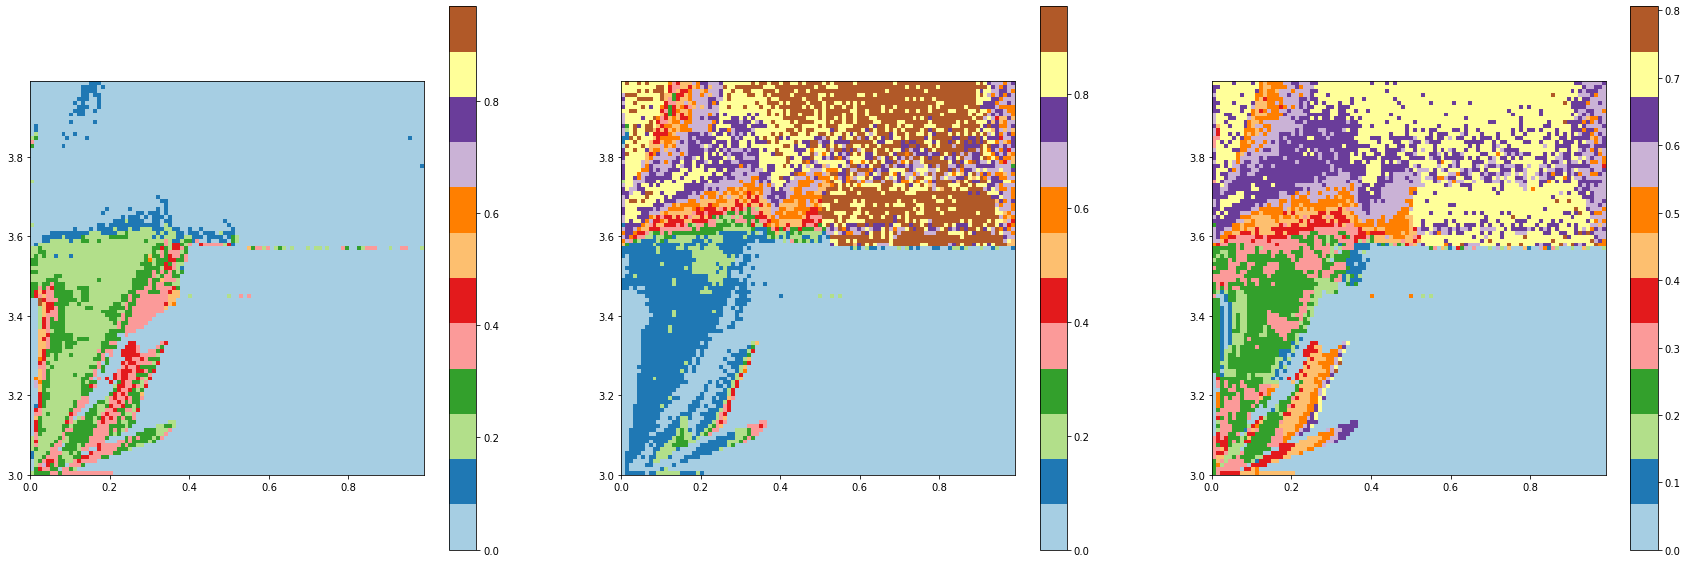

In [5]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(g1PS.T,cmap='Paired',origin='lower',extent=[np.min(eps),np.max(eps),np.min(alphas),np.max(alphas)])
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(g2PS.T,cmap='Paired',origin='lower',extent=[np.min(eps),np.max(eps),np.min(alphas),np.max(alphas)])
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(g3PS.T,cmap='Paired',origin='lower',extent=[np.min(eps),np.max(eps),np.min(alphas),np.max(alphas)])


plt.colorbar()
plt.show()

In [53]:
np.save("g1LGPS",g1PS)
np.save("g2LGPS",g2PS)
np.save("g3LGPS",g3PS)

In [4]:
g1PS = np.load("g1LGPS.npy")
g2PS = np.load("g2LGPS.npy")
g3PS = np.load("g3LGPS.npy")

In [4]:
eps = np.round(np.arange(0,1,0.01),3)
alphas = np.round(np.arange(3,4,0.01),3)
nit  = 1000
neigh = [(1,0),(0,1),(-1,0),(0,-1)]


mapa = maps.logisticMap

psSize = (len(eps),len(alphas))
print("Phase Space size: ", psSize)

g1PS, g2PS, g3PS = np.zeros(psSize),np.zeros(psSize),np.zeros(psSize)

for ie,e in enumerate(eps):
    for ia,a in tqdm.tqdm(enumerate(alphas)):
        c = CML.CML('random',33)
        for n in range(nit):
            par = [a]
            state = np.array(c.getCML(neigh,mapa,e,par))
        m = ga(state,moment=['G1','G2','G3'])
        g1PS[ie,ia] = m['G1']
        g2PS[ie,ia] = m['G2']
        g3PS[ie,ia] = m['G3']
        #print(e,a,"|",ie,ia,"|",m['G2'])
            

Phase Space size:  (100, 100)


100it [3:05:36, 111.37s/it]
100it [05:32,  3.33s/it]
100it [05:30,  3.31s/it]
100it [05:31,  3.32s/it]
100it [05:35,  3.35s/it]
100it [05:33,  3.34s/it]
100it [05:46,  3.47s/it]
100it [06:02,  3.62s/it]
100it [05:54,  3.55s/it]
100it [06:02,  3.63s/it]
100it [05:57,  3.58s/it]
100it [05:58,  3.59s/it]
100it [06:03,  3.64s/it]
100it [05:59,  3.59s/it]
100it [05:45,  3.46s/it]
100it [05:49,  3.50s/it]
100it [05:56,  3.57s/it]
100it [05:59,  3.60s/it]
100it [05:58,  3.58s/it]
100it [05:58,  3.59s/it]
100it [05:52,  3.52s/it]
100it [05:45,  3.45s/it]
100it [05:40,  3.40s/it]
100it [05:30,  3.30s/it]
100it [05:44,  3.44s/it]
100it [05:34,  3.34s/it]
100it [05:26,  3.27s/it]
100it [05:22,  3.22s/it]
100it [05:23,  3.23s/it]
100it [05:21,  3.22s/it]
100it [05:50,  3.51s/it]
100it [05:48,  3.48s/it]
100it [05:55,  3.55s/it]
100it [05:46,  3.47s/it]
100it [05:44,  3.44s/it]
100it [05:45,  3.45s/it]
100it [05:24,  3.25s/it]
100it [05:31,  3.32s/it]
100it [05:41,  3.42s/it]
100it [05:43,  3.44s/i

In [5]:
np.save("g1LGPS_r",g1PS)
np.save("g2LGPS_r",g2PS)
np.save("g3LGPS_r",g3PS)

In [7]:
g1PS_r = np.load("g1LGPS_r.npy")
g2PS_r = np.load("g2LGPS_r.npy")
g3PS_r = np.load("g3LGPS_r.npy")

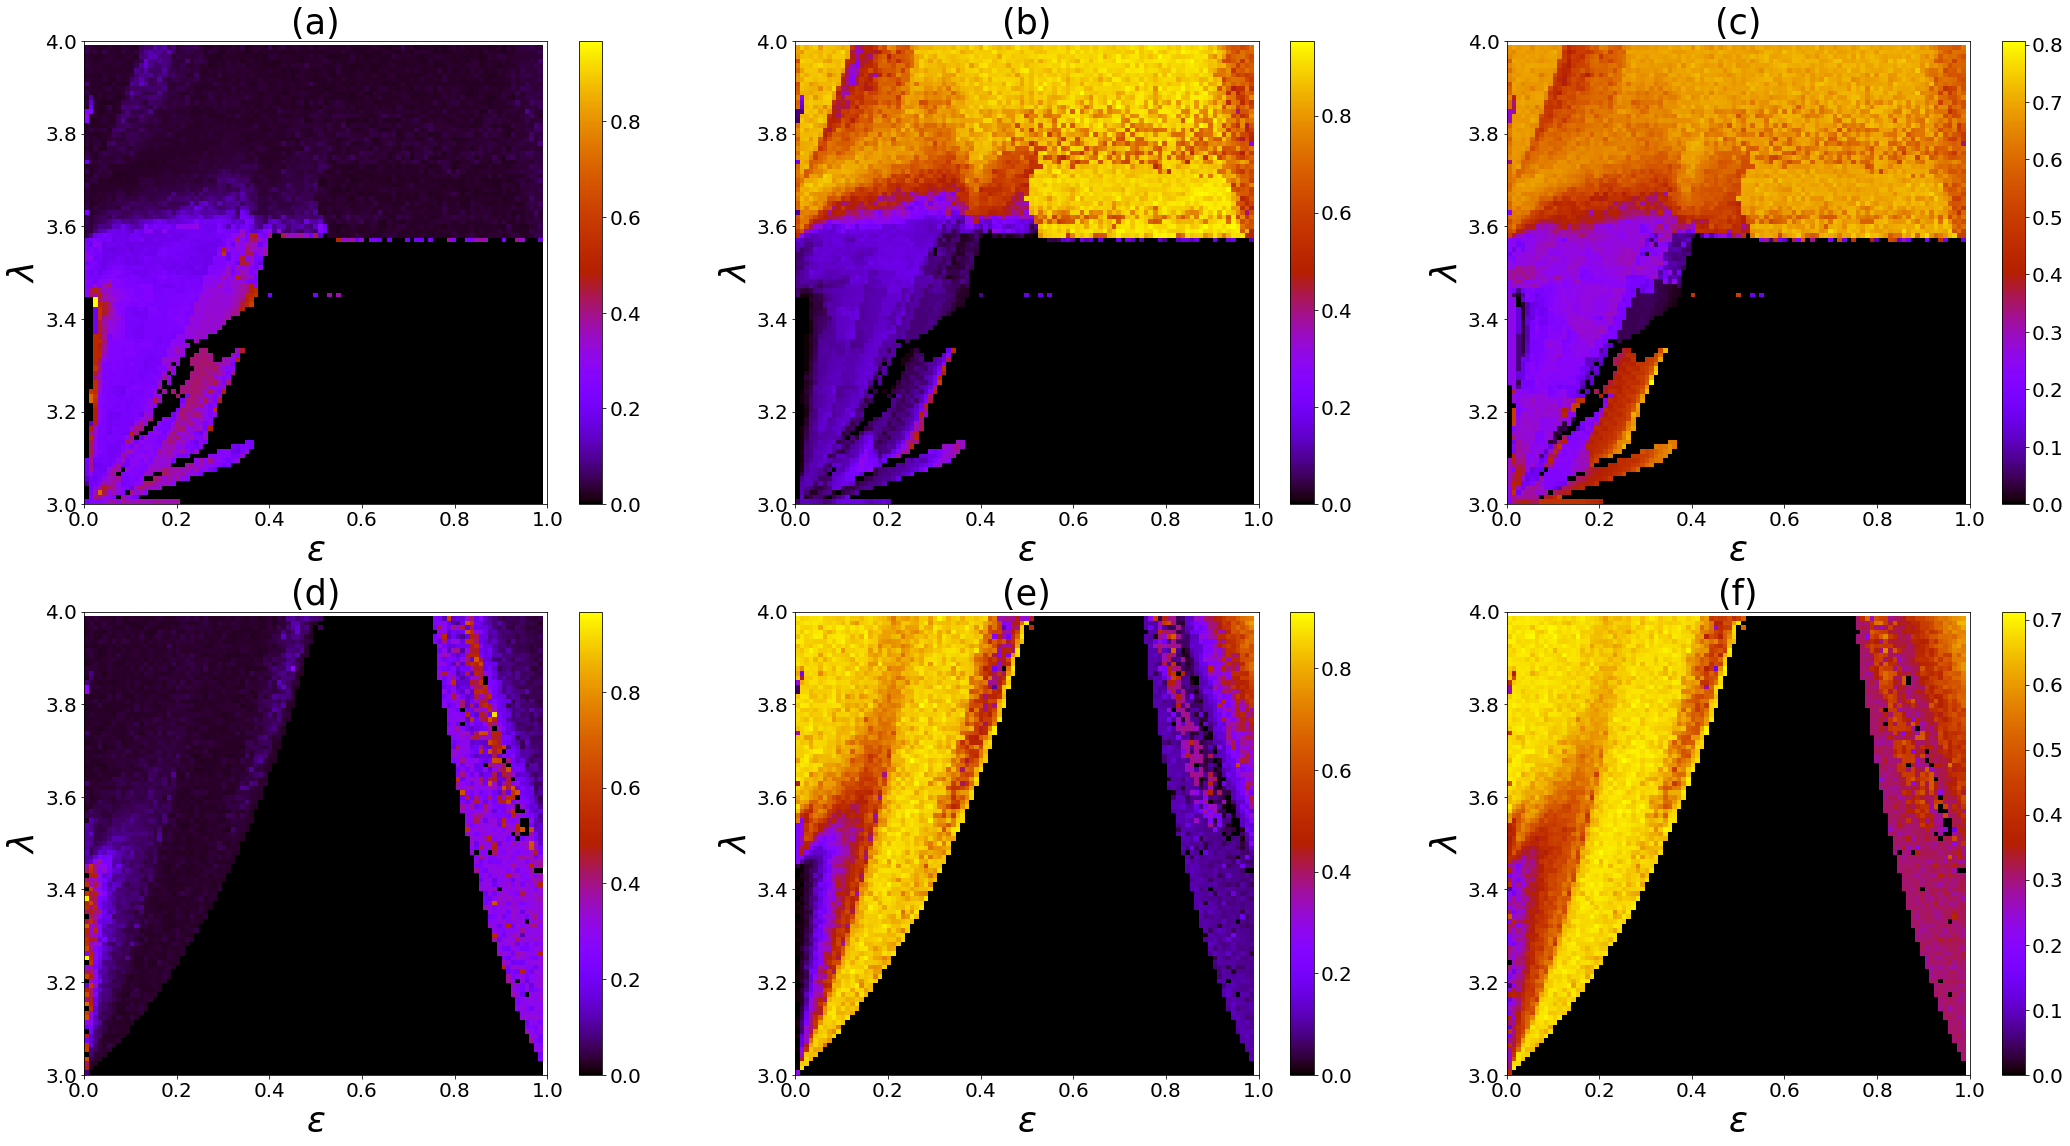

In [43]:
plt.figure(figsize=(30,16))

plt.subplot(2,3,1)
plt.imshow(g1PS.T,cmap='gnuplot',origin='lower',extent=[np.min(eps),np.max(eps),np.min(alphas),np.max(alphas)])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.yticks([3.0,3.2,3.4,3.6,3.8,4.0],fontsize=20)
plt.xlabel(r"$\epsilon$",fontsize=35)
plt.ylabel(r"$\lambda$",fontsize=35)
plt.title("(a)",fontsize=35)

plt.subplot(2,3,2)
plt.imshow(g2PS.T,cmap='gnuplot',origin='lower',extent=[np.min(eps),np.max(eps),np.min(alphas),np.max(alphas)])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.yticks([3.0,3.2,3.4,3.6,3.8,4.0],fontsize=20)
plt.xlabel(r"$\epsilon$",fontsize=35)
plt.ylabel(r"$\lambda$",fontsize=35)
plt.title("(b)",fontsize=35)

plt.subplot(2,3,3)
plt.imshow(g3PS.T,cmap='gnuplot',origin='lower',extent=[np.min(eps),np.max(eps),np.min(alphas),np.max(alphas)])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.yticks([3.0,3.2,3.4,3.6,3.8,4.0],fontsize=20)
plt.xlabel(r"$\epsilon$",fontsize=35)
plt.ylabel(r"$\lambda$",fontsize=35)
plt.title("(c)",fontsize=35)
#################################################################


plt.subplot(2,3,4)
plt.imshow(g1PS_r.T,cmap='gnuplot',origin='lower',extent=[np.min(eps),np.max(eps),np.min(alphas),np.max(alphas)])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.yticks([3.0,3.2,3.4,3.6,3.8,4.0],fontsize=20)
plt.xlabel(r"$\epsilon$",fontsize=35)
plt.ylabel(r"$\lambda$",fontsize=35)
plt.title("(d)",fontsize=35)

plt.subplot(2,3,5)
plt.imshow(g2PS_r.T,cmap='gnuplot',origin='lower',extent=[np.min(eps),np.max(eps),np.min(alphas),np.max(alphas)])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.yticks([3.0,3.2,3.4,3.6,3.8,4.0],fontsize=20)
plt.xlabel(r"$\epsilon$",fontsize=35)
plt.ylabel(r"$\lambda$",fontsize=35)
plt.title("(e)",fontsize=35)

plt.subplot(2,3,6)
plt.imshow(g3PS_r.T,cmap='gnuplot',origin='lower',extent=[np.min(eps),np.max(eps),np.min(alphas),np.max(alphas)])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.yticks([3.0,3.2,3.4,3.6,3.8,4.0],fontsize=20)
plt.xlabel(r"$\epsilon$",fontsize=35)
plt.ylabel(r"$\lambda$",fontsize=35)
plt.title("(f)",fontsize=35)

plt.tight_layout()
plt.show()

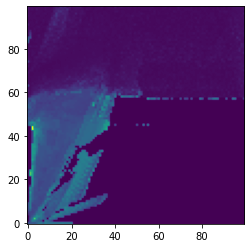

In [41]:
plt.figure()
plt.imshow(np.ravel(g1PS).reshape(100,100).T, origin='lower')
plt.show()